In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
#loading a CSV file using pandas library
df=pd.read_csv("BankNote_Authentication.csv")
print(df.shape)
df.head()

(1372, 5)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
#checking the Null and Dtypes of the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


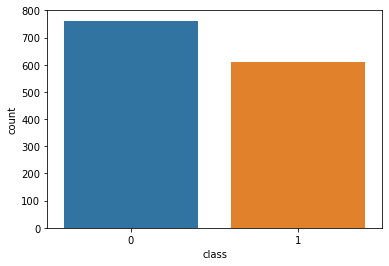

In [12]:
sns.countplot(x=df["class"],data=df)

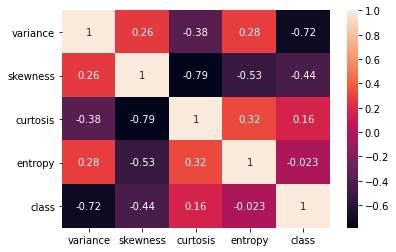

In [13]:
#checking the correlation between the features
sns.heatmap(df.corr(),annot=True)

In [6]:
columns = list(df.columns)
columns.remove('class')

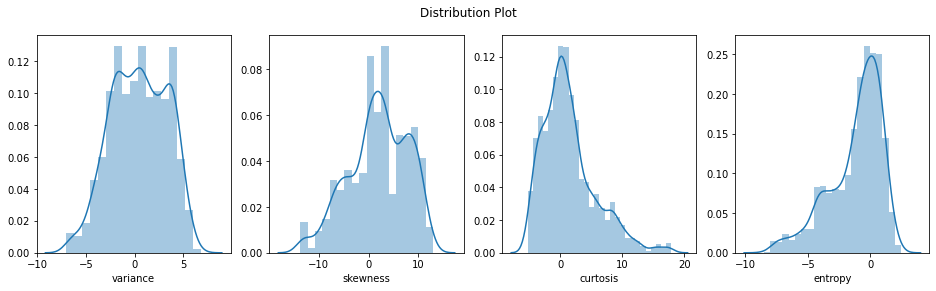

In [14]:
#checking the distribution of the data
fig, ax = plt.subplots(ncols = 4, figsize=(16, 4))
fig.suptitle("Distribution Plot")

for index, column in enumerate(columns):
    sns.distplot(df[column], ax=ax[index])

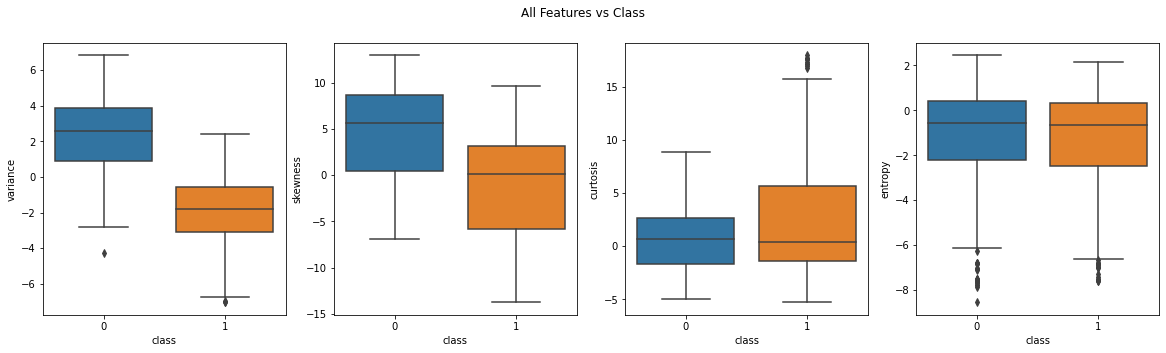

In [15]:
#checking the outliers through box plot
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
fig.suptitle("All Features vs Class")

for index, column in enumerate(columns):
    sns.boxplot(x="class", y=column, data=df, ax=ax[index])

In [16]:
#seperating the labels and features
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
#splitting the training and testting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

#checking the shape of the splitted dataset
print("x_train :",x_train.shape,"x_test :",x_test.shape)
print("y_train :",y_train.shape,"y_test :",y_test.shape)

x_train : (1029, 4) x_test : (343, 4)
y_train : (1029,) y_test : (343,)


In [20]:
#creating the model
model=Sequential()

#here model has 4 inputs and 10 hidden layers
model.add(Dense(10,activation='relu',input_dim=4,kernel_regularizer=keras.regularizers.l1(0.01)))

#here model has 1 output layer(binary output) and sigmoid has activation function
model.add(Dense(1,activation='sigmoid',kernel_regularizer='l1'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
33/33 [==============================] - 3s 35ms/step - loss: 0.5912 - accuracy: 0.8324 - val_loss: 0.5079 - val_accuracy: 0.8776
Epoch 2/20
33/33 [==============================] - 0s 4ms/step - loss: 0.5062 - accuracy: 0.8768 - val_loss: 0.4581 - val_accuracy: 0.8980
Epoch 3/20
33/33 [==============================] - 0s 4ms/step - loss: 0.4585 - accuracy: 0.8957 - val_loss: 0.4226 - val_accuracy: 0.9096
Epoch 4/20
33/33 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.9101 - val_loss: 0.3940 - val_accuracy: 0.9271
Epoch 5/20
33/33 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.9262 - val_loss: 0.3713 - val_accuracy: 0.9359
Epoch 6/20
33/33 [==============================] - 0s 4ms/step - loss: 0.3777 - accuracy: 0.9338 - val_loss: 0.3520 - val_accuracy: 0.9475
Epoch 7/20
33/33 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.9441 - val_loss: 0.3347 - val_accuracy: 0.9504
Epoch 8/20
33/33 [=

In [22]:
#predicting the class of x test
Y_pred=model.predict(x_test)
y_pred=[]
for i in Y_pred:
    if i < .5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [23]:
#making a confucsion matrix to check the performence of the algorithm
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[193,   0],
       [  0, 150]])

In [24]:
# creating classification report to check precision, recall and f1 score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       150

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



In [26]:
model.evaluate(x_test,y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.2225 - accuracy: 1.0000


[0.22249622642993927, 1.0]

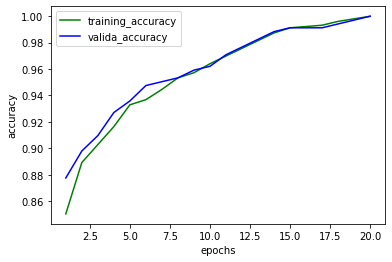

In [29]:
# graph of training and validation accuracy
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1,21)
plt.plot(epochs,train_acc,'g',label='training_accuracy')
plt.plot(epochs,val_acc,'b',label='valida_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

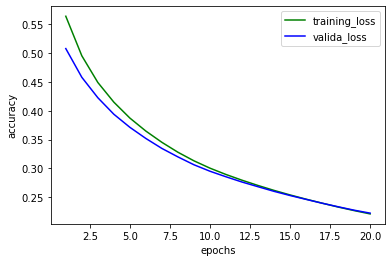

In [30]:
#graph of training loss and validation loss
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,21)
plt.plot(epochs,train_loss,'g',label='training_loss')
plt.plot(epochs,val_loss,'b',label='valida_loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()